<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
LÊ THỊ DIỄM MY

# Day 1̉6: Gram Matrix in Style transfer
---

Set up Gram Matrix by using Numpy

In [ ]:
import numpy as np

def compute_gram_matrix(feature_map: np.ndarray) -> np.ndarray:
  """
  Compute Gram Matrix from feature map
  Args: feature_map(np.ndarray) matrix size (C, H, W)
  Returns: (np.ndarray) Gram matrix size (C, C)
  """
  # Get size of input
  C, H, W = feature_map.shape

  # Convert matrix to shape (C, H*W)
  F = feature_map.reshape(C, H*W)

  # Calculate Gram Matrix G = F <dot product> F.T
  G = np.dot(F, F.transpose())

  # Normalise by pixel count
  G = G / float(H * W)

  return G

In [ ]:
# Generate data set with size (3, 4, 4)
np.random.seed(42)
feature_map = np.random.rand(3, 4, 4)

# Compute Gram Matrix
grand_matrix = compute_gram_matrix(feature_map)

# Print result
print(f"Compute Gram Matrix: \n{grand_matrix}")

Compute Gram Matrix: 
[[0.33432857 0.2207897  0.27598961]
 [0.2207897  0.19580158 0.19452994]
 [0.27598961 0.19452994 0.32603015]]


Set up Gram Matrix by using Pytorch

In [ ]:
import torch
import numpy as np

def compute_gram_matrix_torch(feature_map: np.ndarray):
  feature_map_torch = torch.tensor(feature_map, dtype=torch.float32)
  F_torch = feature_map_torch.view(3, -1)
  grand_matrix_torch = torch.mm(F_torch, F_torch.t()) / (4 * 4)
  return grand_matrix_torch

In [ ]:
# Generate data set with size (3, 4, 4)
np.random.seed(42)
feature_map = np.random.rand(3, 4, 4)

grand_matrix_torch = compute_gram_matrix_torch(feature_map)
print(f"\n Gram Matrix Pytorch:\n {grand_matrix_torch.numpy()}")


 Gram Matrix Pytorch:
 [[0.33432856 0.2207897  0.2759896 ]
 [0.2207897  0.19580159 0.19452995]
 [0.2759896  0.19452995 0.32603014]]


## Exercise 1:

In [ ]:
feature_map = np.array([
    [[1, 2], [3, 4]], # channel 1
    [[5, 6], [7, 8]], # channel 2
    [[9, 10], [11, 12]] # channel 3
])

grand_matrix = compute_gram_matrix(feature_map)
print(grand_matrix)

[[  7.5  17.5  27.5]
 [ 17.5  43.5  69.5]
 [ 27.5  69.5 111.5]]


## Exercise 2:

In [ ]:
def compute_similarity(gram1: np.ndarray, gram2: np.ndarray) -> float:
  """
  Compute similarity between 2 Gram Matrix
  Args:
    gram1 (np.ndarray): Gram Matrix image 1
    gram2 (np.ndarray): Gram Matrix image 2
  Returns:
    float: Similarity between [0, 1]
  """
  numerator = np.sum(gram1 * gram2)
  denominator = np.sqrt(np.sum(gram1 * gram1)) * np.sqrt(np.sum(gram2 * gram2))
  similarity = numerator / denominator
  return similarity

In [ ]:
feature_map1 = np.array([
    [[1, 2], [3, 4]], # channel 1
    [[5, 6], [7, 8]], # channel 2
    [[9, 10], [11, 12]] # channel 3
])

feature_map2 = np.array([
    [[2, 4], [6, 8]], # channel 1
    [[1, 3], [5, 7]], # channel 2
    [[0, 2], [4, 6]] # channel 3
])

# Compute gram matrix
gram1 = compute_gram_matrix(feature_map1)
gram2 = compute_gram_matrix(feature_map2)

# Compute similarity
similarity = compute_similarity(gram1, gram2)
print(f"Similarity: {similarity:.2f}")

Similarity: 0.67


# Day 17: Getting Started with WandB


---



In [33]:
# install
!pip install wandb

In [34]:
!wandb login

wandb: Currently logged in as: lethidiemmy961996 (lethidiemmy961996-aivietnam-edu-vn) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


### Model Linear Regression

In [35]:
import pandas as pd
import wandb

areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]

dataset = pd.DataFrame({
    'areas': areas,
    'prices': prices
})

In [36]:
# forward
def predict(x, w, b):
  return w * x + b

# compute gradient
def gradient(y_hat, y, x):
  dw = 2 * x * (y_hat - y)
  db = 2 * (y_hat - y)

  return (dw, db)

# update weights
def update(w, b, lr, dw, db):
  w -= lr * dw
  b -= lr * db
  return w, b

In [37]:
# init weights
b = 0.04
w = -0.34
lr = 0.01
epochs = 10

# init project wandb
wandb.init(
  # Set the project where this run will be logged
  project="demo-linear-regression",
  config={
      "learning_rate": lr,
      "epochs": epochs,
  },
)

In [38]:
wandb.run.log({"Dataset" :  wandb.Table(dataframe=dataset)})

X_train = dataset['areas']
Y_train = dataset['areas']

N = len(X_train)

# parameters
losses = [] # for visualize, debug, evaluate model

for epoch in range(epochs):
  # for an epoch
  for i in range(N):
    # get a sample
    x = X_train[i]
    y = Y_train[i]

    # predict y_hat
    y_hat = predict(x, w, b)

    # compute loss
    loss = 0.5 * ((y_hat - y) ** 2)

    # tracking loss with wandb
    wandb.log({"loss": loss})

    # compute gradient
    dw, db = gradient(y_hat, y, x)

    # update weights
    w, b = update(w, b, lr, dw, db)

# Mark a run as finished, and finish uploading all data
wandb.finish()


loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.00055


Result:
- xlabel: computation step epochs x len(data)
- ylabel: loss value

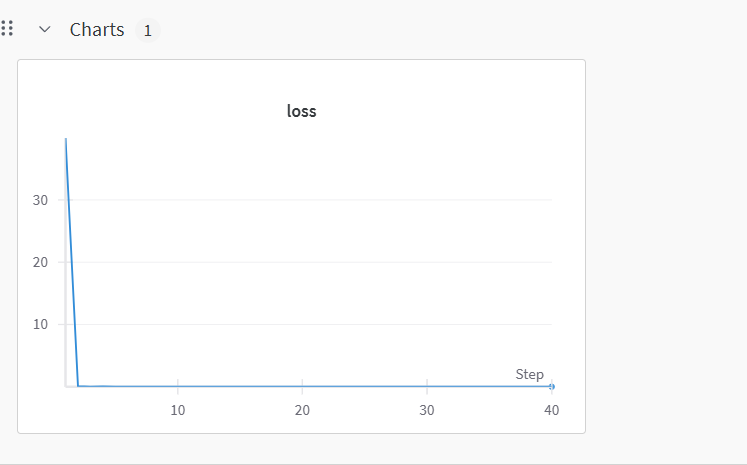

### Exercise

In [ ]:
import pandas as pd
import wandb

In [ ]:
# read csv file
df = pd.read_csv('advertising.csv')
# read head file
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
#1) Preprocess data
#   - Input features: tv, radio, newspaper
#   - Output feature(Label): sales
# Get data to use for training: get input features and output feature
def get_column(table, column_index):
  col_data =  np.array(table.iloc[:, column_index])
  return col_data

def normalize_data(col_data):
  data_norm =(col_data - np.min(col_data)) / (np.max(col_data) - np.min(col_data))
  return data_norm

In [ ]:
first_column = df.iloc[:,0]
first_column

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [ ]:
tv_data = np.array(first_column)
print(tv_data)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

In [ ]:
# after normalize
tv_norm = (tv_data - np.min(tv_data)) / (np.max(tv_data) - np.min(tv_data))
print(tv_norm)

[0.77578627 0.1481231  0.0557998  0.50997633 0.60906324 0.02705445
 0.19208657 0.4041258  0.02671627 0.67331755 0.2211701  0.72370646
 0.07811972 0.32735881 0.68785932 0.65843761 0.22691917 0.94927291
 0.2316537  0.49577274 0.73621914 0.80047345 0.04227257 0.76969902
 0.20831924 0.8867095  0.4808928  0.80960433 0.83902604 0.23638823
 0.98816368 0.37943862 0.32634427 0.89584038 0.32127156 0.98072371
 0.90023673 0.25025364 0.14338857 0.76868448 0.68244843 0.59621238
 0.99053094 0.69732837 0.08251606 0.58978695 0.30098072 0.80892797
 0.76597903 0.22387555 0.67331755 0.33716605 0.72945553 0.61515049
 0.88603314 0.67027393 0.02231992 0.4582347  0.71051742 0.71017924
 0.17855935 0.88129861 0.80689888 0.3449442  0.44098749 0.23097734
 0.10415962 0.4687183  0.80047345 0.73080825 0.67095029 0.36895502
 0.08826513 0.43523842 0.71931011 0.05478526 0.0906324  0.40514034
 0.01589449 0.38992222 0.25600271 0.80858979 0.25228272 0.22894826
 0.71964829 0.65099763 0.25566452 0.37199865 0.2962462  0.3689

In [ ]:
tv = get_column(df, 0)
radio = get_column(df, 1)
newspaper = get_column(df, 2)

sales = get_column(df, 3)

dataset_adsvertise = pd.DataFrame(
    {
        'tv' : tv,
        'radio' : radio,
        'newspaper' : newspaper,
        'sales' : sales
    }
)

In [ ]:
# Build functions
def predict_output(x1, x2, x3, w1, w2, w3, b):
  return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

def compute_gradient(x1, x2, x3, y, y_hat):
  dw1 = 2 * x1 * (y_hat - y)
  dw2 = 2 * x2 * (y_hat - y)
  dw3 = 2 * x3 * (y_hat - y)
  db = 2 * (y_hat - y)
  return dw1, dw2, dw3, db

def update_weights(w1, w2, w3, b, dw1, dw2, dw3, db, lr):
  w1 -= lr * dw1
  w2 -= lr * dw2
  w3 -= lr * dw3
  b -= lr * db
  return w1, w2, w3, b

In [ ]:
# Init model:
lr = 1e-5
epochs = 1000

# init project wandb
wandb.init(
  # Set the project where this run will be logged
  project="adsvertise-linear-regression",
  config={
      "learning_rate": lr,
      "epochs": epochs,
  },
)


In [ ]:
# Normalize data
X1 = normalize_data(tv)
X2 = normalize_data(radio)
X3 = normalize_data(newspaper)
Y = normalize_data(sales)

In [ ]:
# Training stage
wandb.run.log({"Dataset": wandb.Table(dataframe=dataset_adsvertise)})
N = len(tv) # all features have the same length
print(f"len = {N}")
losses = []
# init weights
b = 1
w1 = w2 = w3 = 0

for epoch in range(epochs):
  for i in range(N):
    # get feature for each row and predict each label corresponding
    x1 = X1[i]
    x2 = X2[i]
    x3 = X3[i]

    y = Y[i]

    y_hat = predict_output(x1, x2, x3, w1, w2, w3, b)

    loss = compute_loss(y_hat, y)
    losses.append(loss)
    wandb.log({"Loss": loss})

    dw1, dw2, dw3, db = compute_gradient(x1, x2, x3, y, y_hat)
    w1, w2, w3, b = update_weights(w1, w2, w3, b, dw1, dw2, dw3, db, lr)

# Mark a run as finished, and finish uploading all data
wandb.finish()

len = 200


wandb: ERROR Control-C detected -- Run data was not synced


KeyboardInterrupt: 

# Day 18

# Day 19

# Day 20